In [164]:
import pickle
import requests
from dotenv import load_dotenv
import os

load_dotenv()
key = os.getenv('API_KEY')
mrts = ["Marsiling", "Woodlands", "Admiralty"]
api_url = "http://api.positionstack.com/v1/forward"

"""
longLats = {}
responses = []
for mrt in mrts:
  response = requests.get(f"{api_url}?access_key={key}&query={mrt}+station+singapore")
  responses.append(response.json())
  first_response = response.json()['data'][0]
  if (first_response['confidence'] > 0.9) and (first_response['country']=='Singapore'):
    longLats[f"{mrt} MRT"] = (first_response['longitude'], first_response['latitude'])
    print(f"{first_response['label']}, confidence {first_response['confidence']}")
  else:
    print(f"check {mrt}. confidence of {first_response['confidence']}")
"""

responses = []
mrts = ["Woodlands South", "Woodlands North"]
for mrt in mrts:
  response = requests.get(f"{api_url}?access_key={key}&query={mrt}+station+singapore")
  responses.append(response.json())
  first_response = response.json()['data'][0]
  if (first_response['confidence'] > 0.9) and (first_response['country']=='Singapore'):
    longLats[f"{mrt} MRT"] = (first_response['longitude'], first_response['latitude'])
    print(f"{first_response['label']}, confidence {first_response['confidence']}")
  else:
    print(f"check {mrt}. confidence of {first_response['confidence']}")


#longLats

pickle.dump(longLats, open('./longLat.pkl', 'wb'))
len(longLats)


Woodlands Fire Station, Singapore, confidence 1
Woodlands North Station, Singapore, confidence 1


580

In [171]:
longLats['Woodlands South MRT'] = (103.7938, 1.4273)
pickle.dump(longLats, open('./longLat.pkl', 'wb'))
len(longLats)

580

In [172]:
a = pickle.load(open('./longLat.pkl', 'rb'))
a

{'Marsiling MRT': (103.773684, 1.432404),
 'Woodlands MRT': (103.787231, 1.437255),
 'Admiralty MRT': (103.800634, 1.44066),
 '717B WOODLANDS DR 70': (103.799462, 1.440972),
 '1 MARSILING DR': (103.775741, 1.440645),
 '6 MARSILING DR': (103.776437, 1.442079),
 '24 MARSILING DR': (103.77213, 1.44152),
 '2 MARSILING DR': (103.776696, 1.439912),
 '15 MARSILING LANE': (103.778245, 1.44195),
 '19 MARSILING LANE': (103.777329, 1.443264),
 '180B MARSILING RD': (103.778421, 1.439101),
 '571C WOODLANDS AVE 1': (103.790505, 1.430116),
 '780A WOODLANDS CRES': (103.801468, 1.448493),
 '886D WOODLANDS DR 50': (103.794612, 1.438366),
 '886B WOODLANDS DR 50': (103.794612, 1.438366),
 '785B WOODLANDS RISE': (103.8055, 1.446892),
 '784C WOODLANDS RISE': (103.805257, 1.445373),
 '152 WOODLANDS ST 13': (103.77423, 1.435074),
 '145 WOODLANDS ST 13': (103.773246, 1.436117),
 '148 WOODLANDS ST 13': (103.774029, 1.435771),
 '319 WOODLANDS ST 31': (103.777398, 1.431514),
 '302A WOODLANDS ST 31': (103.77506, 1

In [58]:
# Import libraries
import numpy as np
import pandas as pd
import re
import torch
#import matplotlib.pyplot as plt
import fastai.tabular.all as fastai
np.set_printoptions(linewidth=130)

# clean up data: area, date, floor, price
def load_csv():
  #return pd.read_csv('./data/Woodlands_June22_May23.csv')
  return pd.read_csv('./data/resale-flat-from-jan-2017.csv')
floor_dict = { f'0{i*3+1} TO 0{i*3+3}' if i < 3 else f'{i*3+1} TO {i*3+3}': i*3+2  for i in range(17)  }
def floor_cleanup(df):
  df['floor'] = df.storey_range.apply(lambda x:float(floor_dict[x]) if isinstance(x,str) else x)
  df.drop(['storey_range'], axis=1, inplace=True)
  return df
date_dict = { f'20{17+i}-0{j+1}' if j < 9 else f'20{17+i}-{j+1}': i*12+j  for i in range(7) for j in range(12)  }
def date_cleanup(df):
  df['date'] = df.month.apply(lambda x:float(date_dict[x]) if isinstance(x,str) else x)
  df.drop(['month'], axis=1, inplace=True)
  return df
def load_and_cleanup():
  df = load_csv()
  df = floor_cleanup(df)
  df = date_cleanup(df)
  return df

df = load_and_cleanup()
df.describe()
date_max = df.date.max()
#df.head()
dfW = df[(df.town=="WOODLANDS") & (df.date > date_max-12)]
dfW

from pathlib import Path
file = Path('./data/Woodlands_June22_May23.csv')
dfW.to_csv(file,index=False)


In [107]:
def load_csv():
  return pd.read_csv('./data/Woodlands_June22_May23.csv')
df = load_csv()
blk_street = df.block + ' ' + df.street_name

#responses = []
#for add in blk_street.unique():
#  response = requests.get(f"{api_url}?access_key={key}&query={add}+singapore")
#  responses.append(response.json())
#  first_response = response.json()['data'][0]
#  if (first_response['confidence'] > 0.9):
#    longLats[f"{add}"] = (first_response['longitude'], first_response['latitude'])
#    print(f"{first_response['label']}, confidence {first_response['confidence']}")
#  else:
#    print(f"check {mrt}. confidence of {first_response['confidence']}")

pickle.dump(longLats, open('./longLat.pkl', 'wb'))
longLats

{'Marsiling MRT': (103.773684, 1.432404),
 'Woodlands MRT': (103.787231, 1.437255),
 'Admiralty MRT': (103.800634, 1.44066),
 '717B WOODLANDS DR 70': (103.799462, 1.440972),
 '1 MARSILING DR': (103.775741, 1.440645),
 '6 MARSILING DR': (103.776437, 1.442079),
 '24 MARSILING DR': (103.77213, 1.44152),
 '2 MARSILING DR': (103.776696, 1.439912),
 '15 MARSILING LANE': (103.778245, 1.44195),
 '19 MARSILING LANE': (103.777329, 1.443264),
 '180B MARSILING RD': (103.778421, 1.439101),
 '571C WOODLANDS AVE 1': (103.790505, 1.430116),
 '780A WOODLANDS CRES': (103.801468, 1.448493),
 '886D WOODLANDS DR 50': (103.794612, 1.438366),
 '886B WOODLANDS DR 50': (103.794612, 1.438366),
 '785B WOODLANDS RISE': (103.8055, 1.446892),
 '784C WOODLANDS RISE': (103.805257, 1.445373),
 '152 WOODLANDS ST 13': (103.77423, 1.435074),
 '145 WOODLANDS ST 13': (103.773246, 1.436117),
 '148 WOODLANDS ST 13': (103.774029, 1.435771),
 '319 WOODLANDS ST 31': (103.777398, 1.431514),
 '302A WOODLANDS ST 31': (103.77506, 1

In [71]:
blk_street.unique()

array(['717B WOODLANDS DR 70', '1 MARSILING DR', '6 MARSILING DR', '24 MARSILING DR', '2 MARSILING DR', '15 MARSILING LANE',
       '19 MARSILING LANE', '180B MARSILING RD', '571C WOODLANDS AVE 1', '780A WOODLANDS CRES', '886D WOODLANDS DR 50',
       '886B WOODLANDS DR 50', '785B WOODLANDS RISE', '784C WOODLANDS RISE', '152 WOODLANDS ST 13', '145 WOODLANDS ST 13',
       '148 WOODLANDS ST 13', '319 WOODLANDS ST 31', '302A WOODLANDS ST 31', '34 MARSILING DR', '12B MARSILING LANE',
       '613 WOODLANDS AVE 4', '791 WOODLANDS AVE 6', '793 WOODLANDS AVE 6', '719 WOODLANDS AVE 6', '758 WOODLANDS AVE 6',
       '761 WOODLANDS AVE 6', '724 WOODLANDS AVE 6', '679 WOODLANDS AVE 6', '732 WOODLANDS CIRCLE', '765 WOODLANDS CIRCLE',
       '775 WOODLANDS CRES', '780D WOODLANDS CRES', '782E WOODLANDS CRES', '782C WOODLANDS CRES', '526 WOODLANDS DR 14',
       '528 WOODLANDS DR 14', '511 WOODLANDS DR 14', '574B WOODLANDS DR 16', '546 WOODLANDS DR 16', '702 WOODLANDS DR 40',
       '604 WOODLANDS DR

In [77]:
errors = ["574A WOODLANDS DR 16", "574B WOODLANDS DR 16", 
          "691A WOODLANDS DR 73", "691B WOODLANDS DR 73", '691C WOODLANDS DR 73', '691D WOODLANDS DR 73', 
          "693A WOODLANDS AVE 6", "693B WOODLANDS AVE 6", '693C WOODLANDS AVE 6'
          '694A WOODLANDS DR 62', '694B WOODLANDS DR 62', '694C WOODLANDS DR 62', '694D WOODLANDS DR 62',
]
len(errors)
len(longLats)
longLats

{'Marsiling MRT': (103.773684, 1.432404),
 'Woodlands MRT': (103.787231, 1.437255),
 'Admiralty MRT': (103.800634, 1.44066),
 '717B WOODLANDS DR 70': (103.799462, 1.440972),
 '1 MARSILING DR': (103.775741, 1.440645),
 '6 MARSILING DR': (103.776437, 1.442079),
 '24 MARSILING DR': (103.77213, 1.44152),
 '2 MARSILING DR': (103.776696, 1.439912),
 '15 MARSILING LANE': (103.778245, 1.44195),
 '19 MARSILING LANE': (103.777329, 1.443264),
 '180B MARSILING RD': (103.778421, 1.439101),
 '571C WOODLANDS AVE 1': (103.790505, 1.430116),
 '780A WOODLANDS CRES': (103.801468, 1.448493),
 '886D WOODLANDS DR 50': (103.794612, 1.438366),
 '886B WOODLANDS DR 50': (103.794612, 1.438366),
 '785B WOODLANDS RISE': (103.8055, 1.446892),
 '784C WOODLANDS RISE': (103.805257, 1.445373),
 '152 WOODLANDS ST 13': (103.77423, 1.435074),
 '145 WOODLANDS ST 13': (103.773246, 1.436117),
 '148 WOODLANDS ST 13': (103.774029, 1.435771),
 '319 WOODLANDS ST 31': (103.777398, 1.431514),
 '302A WOODLANDS ST 31': (103.77506, 1

In [108]:
dfL = df[(~df.block.str.startswith('574'))&(~df.block.str.startswith('691'))&(~df.block.str.startswith('693'))&(~df.block.str.startswith('694'))]
file = Path('./data/Woodlands_June22_May23_without_newest.csv')
dfL.to_csv(file,index=False)

In [109]:
def load_csv():
  return pd.read_csv('./data/Woodlands_June22_May23_without_newest.csv')
df = load_csv()
df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,floor,date
0,WOODLANDS,2 ROOM,717B,WOODLANDS DR 70,47.0,2-room,2017,94 years 06 months,340000.0,11.0,65.0
1,WOODLANDS,3 ROOM,1,MARSILING DR,65.0,Improved,1974,51 years 02 months,315000.0,5.0,65.0
2,WOODLANDS,3 ROOM,6,MARSILING DR,65.0,Improved,1976,52 years 08 months,305000.0,14.0,65.0
3,WOODLANDS,3 ROOM,24,MARSILING DR,67.0,New Generation,1977,54 years 01 month,295000.0,14.0,65.0
4,WOODLANDS,3 ROOM,2,MARSILING DR,65.0,Improved,1974,51 years 02 months,300000.0,8.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
1858,WOODLANDS,EXECUTIVE,654,WOODLANDS RING RD,141.0,Apartment,1998,73 years 09 months,788000.0,11.0,76.0
1859,WOODLANDS,EXECUTIVE,405,WOODLANDS ST 41,177.0,Apartment,1995,71 years 04 months,900000.0,2.0,76.0
1860,WOODLANDS,EXECUTIVE,411,WOODLANDS ST 41,177.0,Apartment,1995,71 years 03 months,950000.0,8.0,76.0
1861,WOODLANDS,EXECUTIVE,837,WOODLANDS ST 82,146.0,Maisonette,1989,65 years 02 months,750000.0,2.0,76.0


In [117]:
def lat_long(df):
  adds = (df.block + ' ' + df.street_name)
  longLat = adds.apply(lambda x: longLats[x])
  df['long'] = longLat.apply(lambda x: x[0])
  df['lat'] = longLat.apply(lambda x: x[1])
  return df
lat_long(df)
df.describe()

,floor_area_sqm,lease_commence_date,resale_price,floor,date,long,lat
count,1863.000000,1863.000000,1.863000e+03,1863.000000,1863.000000,1863.000000,1863.000000
mean,104.793881,1999.196994,5.206933e+05,7.207729,70.501342,103.792039,1.438748
std,25.779354,11.115996,1.299960e+05,4.107224,3.357483,0.010475,0.005768
min,37.000000,1974.000000,2.450000e+05,2.000000,65.000000,103.771674,1.426616
25%,92.000000,1995.000000,4.450000e+05,5.000000,68.000000,103.781939,1.433693
50%,102.000000,1998.000000,5.050000e+05,8.000000,71.000000,103.794612,1.438646
75%,121.000000,2003.000000,5.750000e+05,11.000000,73.000000,103.800243,1.443610
max,192.000000,2018.000000,1.100000e+06,32.000000,76.000000,103.808568,1.448493


In [118]:
import matplotlib.pyplot as plt
import numpy as np




In [120]:
dls = fastai.TabularDataLoaders.from_df(df,procs=[fastai.Normalize],cont_names=["floor", "floor_area_sqm", "lease_commence_date", "date", "lat","long"],y_names=["resale_price"])
dls.show_batch()

,floor,floor_area_sqm,lease_commence_date,date,lat,long,resale_price
0,2.0,146.000001,2000.0,72.0,1.433941,103.793137,700000.0
1,17.0,93.000000,2017.0,72.0,1.437814,103.792847,596000.0
2,2.0,141.000000,2000.0,72.0,1.440761,103.802673,668000.0
3,8.0,90.000000,2001.0,67.0,1.438646,103.797913,455000.0
4,5.0,130.000001,2000.0,67.0,1.438825,103.799294,688000.0
5,14.0,91.000001,1977.0,76.0,1.441934,103.772057,390000.0
6,11.0,66.999999,2016.0,74.0,1.431529,103.775063,455000.0
7,8.0,120.000000,1999.0,68.0,1.432913,103.795975,540000.0
8,2.0,141.000000,1998.0,67.0,1.438211,103.801476,680000.0
9,8.0,120.000000,2000.0,69.0,1.432452,103.795456,580000.0


SuggestedLRs(valley=0.001737800776027143, slide=6.309573450380412e-07)

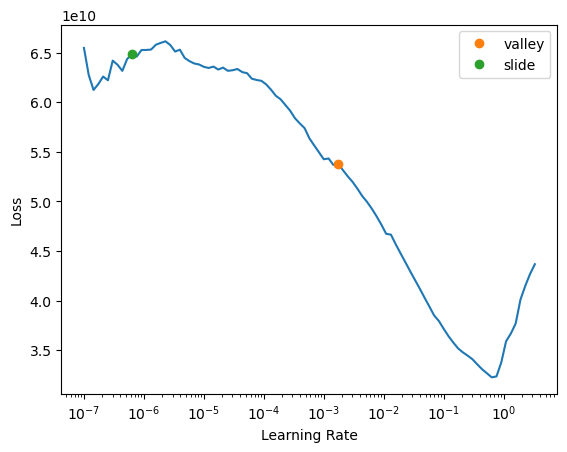

In [121]:
def MSE(yhat,y):
  return torch.mean(torch.square(yhat-y))
def RMSE(yhat,y):
  return torch.sqrt(MSE(yhat,y))
learn = fastai.tabular_learner(dls,y_range=(df.resale_price.min()*0.95, df.resale_price.max()*1.05),loss_func=MSE,metrics=RMSE)
learn.lr_find(suggest_funcs=(fastai.valley,fastai.slide))


In [123]:
learn = fastai.tabular_learner(
  dls,y_range=(df.resale_price.min()*0.95, df.resale_price.max()*1.05),
  loss_func=MSE,metrics=RMSE,
  cbs=[fastai.SaveModelCallback(),fastai.EarlyStoppingCallback(patience=5)]
)
learn.fit_one_cycle(100,1e-1)
#learn.validate()


epoch,train_loss,valid_loss,RMSE,time
0,24091654144.000000,8592731136.000000,90906.031250,00:00
1,14015785984.000000,3706406400.000000,60526.875000,00:00
2,8588767232.000000,2058782208.000000,45295.886719,00:00
3,5720065536.000000,1239831808.000000,34845.046875,00:00
4,4215852288.000000,1356617344.000000,36734.734375,00:00
5,3227091968.000000,2422353152.000000,49112.843750,00:00
6,2888499200.000000,1158780672.000000,33732.156250,00:00
7,2438332672.000000,948368128.000000,30545.748047,00:00
8,2159126784.000000,1004912256.000000,31471.849609,00:00
9,2126108928.000000,1763474048.000000,41916.687500,00:00


In [124]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 30545.748046875.


(#2) [948368128.0,30545.748046875]

In [186]:
# predict prices on map
row = df.drop(['resale_price'], axis=1).iloc[0].copy()
cats = ['floor', 'floor_area_sqm', 'lease_commence_date', 'date']
for cat in cats:
  row[cat] = df[cat].median()
latMin, latMax = df.lat.min(),df.lat.max()
latLeft = latMin - (latMax-latMin)/10
latRight = latMax + (latMax-latMin)/10
longMin, longMax = df.long.min(),df.long.max()
longLeft = longMin - (longMax-longMin)/10
longRight = longMax + (longMax-longMin)/10
n1 = 5*20
n2 = 3*20
longs = np.linspace(longLeft, longRight, n1)
lats = np.linspace(latLeft, latRight, n2)
prices = np.ndarray((n2,n1))
for i,lat in enumerate(lats):
  row['lat'] = lat
  for j,long in enumerate(longs):
    row['long'] = long
    _, yPred, _ = learn.predict(row)
    prices[i][j] = yPred.item()

In [239]:
import itertools
all_list = [
  [df.floor.quantile(0.25), df.floor.quantile(0.55), df.floor.quantile(0.75),],
  [df.area.quantile(0.25), df.area.quantile(0.55), df.area.quantile(0.75),],
  [df.lease.quantile(0.25), df.lease.quantile(0.55), df.lease.quantile(0.75),],
  [df.date.quantile(0.25), df.date.quantile(0.55), df.date.quantile(0.75),],
            ]
perm_list = list(itertools.product(*all_list))
# predict prices on map
row = df.drop(['price','year'], axis=1).iloc[0].copy()
cats = ['floor', 'area', 'lease', 'date']
for cat in cats:
  row[cat] = df[cat].median()
latMin, latMax = df.lat.min(),df.lat.max()
latLeft = latMin - (latMax-latMin)/10
latRight = latMax + (latMax-latMin)/10
longMin, longMax = df.long.min(),df.long.max()
longLeft = longMin - (longMax-longMin)/10
longRight = longMax + (longMax-longMin)/10
n1 = 5*5
n2 = 3*5
longs = np.linspace(longLeft, longRight, n1)
lats = np.linspace(latLeft, latRight, n2)
prices = np.ndarray((n2,n1))
for i,lat in enumerate(lats):
  row['lat'] = lat
  for j,long in enumerate(longs):
    row['long'] = long
    preds = []
    for k in perm_list:
      row['floor'] = k[0]
      row['area'] = k[1]
      row['lease'] = k[2]
      row['date'] = k[3]
      _, yPred, _ = learn.predict(row)
      preds.append(yPred.item())
    prices[i][j] = np.mean(preds)

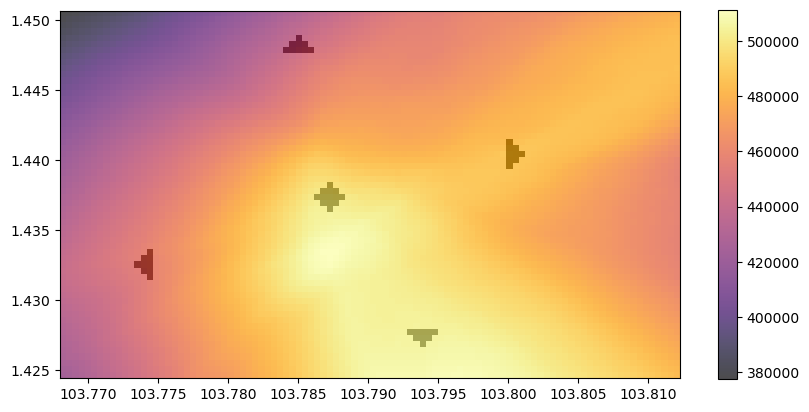

In [229]:
def min_coords(long,lat):
  return (np.abs((longs-long)).argmin(), np.abs(lats-lat).argmin())
mrt_map = np.zeros((n2,n1))
mrts = ["Marsiling MRT", "Woodlands MRT", "Admiralty MRT", "Woodlands North MRT", "Woodlands South MRT"]
#for mrt in mrts[:-1]:
#  (i,j) = min_coords(*longLats[mrt])
#  for m in range(3):
#    for n in range(3):
#      mrt_map[j+m-1][i+n-1] = 1
(i,j) = min_coords(*longLats[mrts[3]])
mrt_map[j+1][i]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j-1][i-2]=1
mrt_map[j-1][i-1]=1
mrt_map[j-1][i+2]=1
mrt_map[j-1][i+1]=1
mrt_map[j-1][i]=1
(i,j) = min_coords(*longLats[mrts[4]])
mrt_map[j-1][i]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j+1][i-2]=1
mrt_map[j+1][i-1]=1
mrt_map[j+1][i+2]=1
mrt_map[j+1][i+1]=1
mrt_map[j+1][i]=1
(i,j) = min_coords(*longLats[mrts[0]])
mrt_map[j-2][i+1]=1
mrt_map[j-1][i+1]=1
mrt_map[j-1][i]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j+1][i]=1
mrt_map[j+1][i+1]=1
mrt_map[j+2][i+1]=1
(i,j) = min_coords(*longLats[mrts[2]])
mrt_map[j-2][i-1]=1
mrt_map[j-1][i-1]=1
mrt_map[j-1][i]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j+1][i]=1
mrt_map[j+1][i-1]=1
mrt_map[j+2][i-1]=1
(i,j) = min_coords(*longLats[mrts[1]])
mrt_map[j+1][i]=1
mrt_map[j+1][i-1]=1
mrt_map[j+1][i+1]=1
mrt_map[j-1][i]=1
mrt_map[j-1][i+1]=1
mrt_map[j-1][i-1]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j][i-2]=1
mrt_map[j][i+2]=1
mrt_map[j+2][i]=1
mrt_map[j-2][i]=1


fig,ax=plt.subplots()
#mrt
#color map
shw2 = ax.imshow(mrt_map, extent=[longLeft, longRight, latLeft, latRight], origin='lower',cmap='Greys',alpha=1.0)
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=0.7, cmap='inferno')
bar = plt.colorbar(shw)
fig.set_figwidth(10)

plt.show()

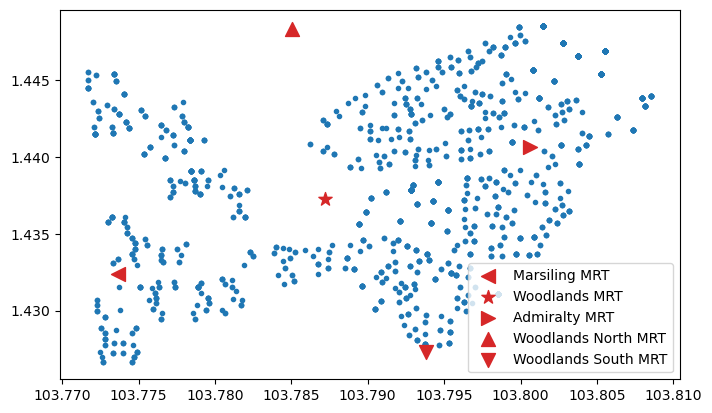

In [230]:
mrts = ["Marsiling MRT", "Woodlands MRT", "Admiralty MRT", "Woodlands North MRT", "Woodlands South MRT"]
markers = ['<', '*', '>', "^", "v"]

fig,ax2=plt.subplots()
ax2.scatter(df.long,df.lat,marker='.')
for i,mrt in enumerate(mrts):
  ax2.scatter([longLats[mrt][0]], [longLats[mrt][1]],marker=markers[i],c='#d62728',label=mrt,s=100)
ax2.legend(loc='lower right')
fig.set_figwidth(8)

plt.show()


for mrt in mrts:
  (i,j) = min_coords(*longLats[mrt])


In [8]:
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.metrics import mean_squared_error
m4 = rf().fit(trn_xs,trn_y)

mse = mean_squared_error(val_y, m4.predict(val_xs),squared=False)
trn_mse = mean_squared_error(trn_y, m4.predict(trn_xs), squared=False)
print(f"{trn_mse} vs {mse}.")

6675.227262087143 vs 17644.10360068539.


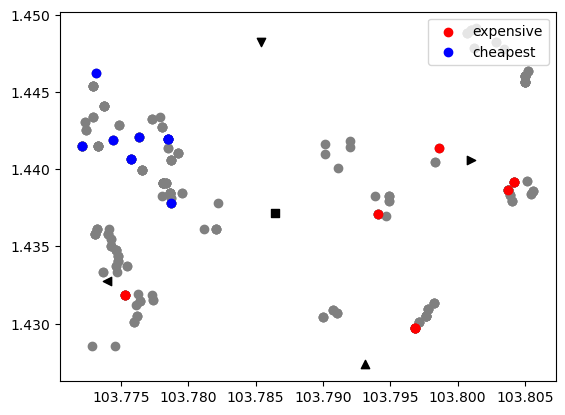

In [73]:
expensive = df.nlargest(10,'price')
cheapest = df.nsmallest(10,'price')

largestCoords = []
smallestCoords = []
for i,row in expensive.iterrows():
  largestCoords.append((df.iloc[i].lat, df.iloc[i].long))
for i,row in cheapest.iterrows():
  smallestCoords.append((df.iloc[i].lat, df.iloc[i].long))
fig,ax2=plt.subplots()

ax2.scatter(df.long,df.lat,c='grey')
for mrt,x in mrts.items():
  ax2.scatter([x['coords'][1]], [x['coords'][0]],marker=x['marker'],c='black')
ax2.scatter([y for _,y in largestCoords], [x for x,_ in largestCoords],marker='o',c='red',label='expensive')
ax2.scatter([y for _,y in smallestCoords], [x for x,_ in smallestCoords],marker='o',c='blue',label='cheapest')
ax2.legend(loc='upper right')

plt.show()



In [78]:
cheapest.describe()

,floor,area,year,lease,price,date,lat,long
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.40000,65.800000,1977.400000,54.166667,274888.800000,738331.200000,1.441686,103.776144
std,2.75681,3.457681,3.657564,3.615382,11665.299394,73.290594,0.002054,0.002403
min,2.00000,60.000000,1974.000000,51.000000,248888.000000,738276.000000,1.437830,103.772100
25%,2.00000,65.000000,1976.000000,52.208333,268000.000000,738276.000000,1.440887,103.774698
50%,5.00000,65.000000,1976.000000,52.708333,280000.000000,738291.500000,1.441945,103.776020
75%,5.00000,66.500000,1977.000000,54.104167,282250.000000,738368.000000,1.441980,103.778470
max,11.00000,74.000000,1985.000000,61.666667,285000.000000,738490.000000,1.446220,103.778710


In [79]:
expensive.describe()


,floor,area,year,lease,price,date,lat,long
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,15.500000,68.000000,2017.200000,93.891667,471368.800000,738502.00000,1.434821,103.794591
std,7.382412,1.154701,1.135292,1.262010,12988.684005,95.19337,0.004671,0.010785
min,11.000000,67.000000,2015.000000,90.833333,458000.000000,738307.00000,1.429700,103.775270
25%,11.000000,67.250000,2016.250000,93.500000,461766.000000,738490.00000,1.430238,103.794758
50%,12.500000,68.000000,2018.000000,94.458333,467000.000000,738490.00000,1.434475,103.796850
75%,14.000000,68.000000,2018.000000,94.770833,483500.000000,738573.00000,1.439030,103.802480
max,32.000000,71.000000,2018.000000,94.833333,490000.000000,738611.00000,1.441350,103.804190


In [194]:
from sklearn.linear_model import LinearRegression

def rmse(y1,y2):
  return np.sqrt(np.mean(np.square(y1-y2)))
xs_lin = df.drop(['price','year','lat','long'], axis=1)
y = df.price
m = LinearRegression().fit(xs_lin,y)
m.score(xs_lin,y)
rmse(y,m.predict(xs_lin))

17510.53809781898

In [204]:
[floor_coef, area_coef, lease_coef, date_coef] = m.coef_
pred = m.predict(xs_lin.iloc[0].values.reshape(1,-1))
print(f'{pred} vs {df.iloc[0].price}')

[318553.90553789] vs 300500.0


/home/kelvinsoh/mambaforge/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [161]:
lease_median = df.lease.median()
floor_median = df.floor.median()
area_median = df.area.median()
date_median = df.date.median()
df2 = df.copy()
df2['price'] = df.price + (lease_median-df.lease)*lease_coef + (floor_median-df.floor)*floor_coef + (area_median-df.area)*area_coef + (date_median-df.date)*date_coef

df2.head()


,floor,area,year,lease,price,date,lat,long
0,2.0,67.0,1977,53.166667,340528.402538,738641.0,1.44154,103.77210
1,11.0,65.0,1976,51.750000,349158.055838,738641.0,1.44198,103.77847
2,23.0,67.0,2015,91.250000,333254.121255,738641.0,1.43913,103.77814
3,8.0,68.0,2018,94.416667,362461.527715,738641.0,1.43834,103.80388
4,8.0,68.0,2018,94.416667,367461.527715,738641.0,1.43862,103.80561


In [125]:
df.head()

,floor,area,year,lease,price,date,lat,long
0,2.0,67.0,1977,53.166667,300500.0,738641.0,1.44154,103.77210
1,11.0,65.0,1976,51.750000,315000.0,738641.0,1.44198,103.77847
2,23.0,67.0,2015,91.250000,430000.0,738641.0,1.43913,103.77814
3,8.0,68.0,2018,94.416667,445000.0,738641.0,1.43834,103.80388
4,8.0,68.0,2018,94.416667,450000.0,738641.0,1.43862,103.80561


In [162]:
dls = fastai.TabularDataLoaders.from_df(df2,procs=[fastai.Normalize],cont_names=["lat","long"],y_names=["price"],valid_idx=range(60))
dls.show_batch()

,lat,long,price
0,1.43830,103.794891,371043.53125
1,1.43913,103.778351,329004.78125
2,1.43864,103.803772,380361.71875
3,1.43849,103.778618,354640.84375
4,1.44154,103.772102,343257.40625
5,1.43578,103.773033,366786.96875
6,1.43011,103.797096,380717.34375
7,1.44328,103.777298,358836.75000
8,1.44154,103.772102,345970.46875
9,1.43710,103.794060,350212.56250


SuggestedLRs(valley=0.0004786300996784121, slide=6.309573450380412e-07)

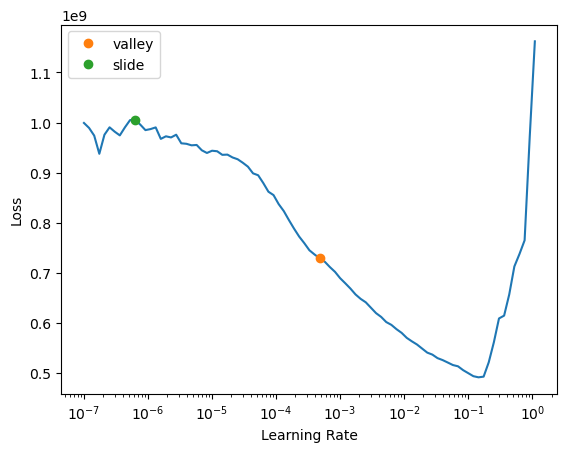

In [163]:
learn = fastai.tabular_learner(dls,y_range=(df2.price.min()*0.9, df2.price.max()*1.1),loss_func=MSE,metrics=RMSE)
learn.lr_find(suggest_funcs=(fastai.valley,fastai.slide))

In [164]:
learn = fastai.tabular_learner(
  dls,y_range=(df2.price.min()*0.9, df2.price.max()*1.1),
  loss_func=MSE,metrics=RMSE,
  cbs=[fastai.SaveModelCallback(),fastai.EarlyStoppingCallback(patience=5)]
)
learn.fit(100,lr=1e-2)

epoch,train_loss,valid_loss,RMSE,time
0,4321917952.000000,1891045888.000000,43486.160156,00:00
1,3308475904.000000,344403328.000000,18558.107422,00:00
2,2454971392.000000,957193792.000000,30938.548828,00:00
3,2103816320.000000,444984736.000000,21094.662109,00:00
4,1721751168.000000,496566080.000000,22283.763672,00:00
5,1513089536.000000,445896512.000000,21116.261719,00:00
6,1325163648.000000,336771936.000000,18351.347656,00:00
7,1175310464.000000,549767552.000000,23447.123047,00:00
8,1072029504.000000,399908192.000000,19997.705078,00:00
9,964803200.000000,311927488.000000,17661.468750,00:00


In [165]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 16551.693359375.


(#2) [273958528.0,16551.693359375]

In [166]:
# predict prices on map
row = df2.drop('price', axis=1).iloc[0].copy()
cats = ['floor', 'area', 'date']
for cat in cats:
  row[cat] = df[cat].median()
latMin, latMax = df.lat.min(),df.lat.max()
latLeft = latMin - (latMax-latMin)/10
latRight = latMax + (latMax-latMin)/10
longMin, longMax = df.long.min(),df.long.max()
longLeft = longMin - (longMax-longMin)/10
longRight = longMax + (longMax-longMin)/10
n1 = 5*5
n2 = 3*5
longs = np.linspace(longLeft, longRight, n1)
lats = np.linspace(latLeft, latRight, n2)
prices = np.ndarray((n2,n1))
for i,lat in enumerate(lats):
  row['lat'] = lat
  for j,long in enumerate(longs):
    row['long'] = long
    _, yPred, _ = learn.predict(row)
    prices[i][j] = yPred.item()

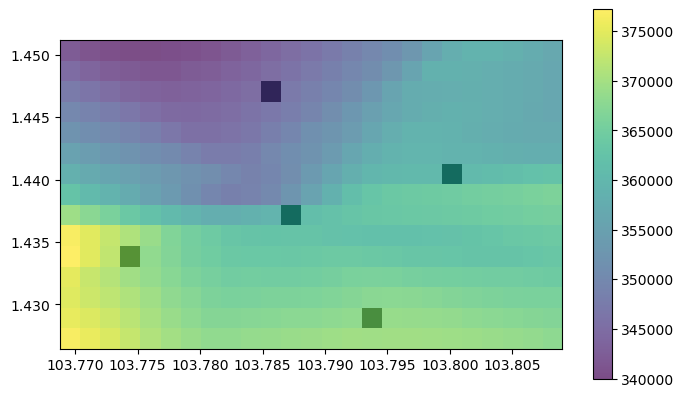

In [167]:
fig,ax=plt.subplots()
#mrt
shw2 = ax.imshow(mrt_map, extent=[longLeft, longRight, latLeft, latRight], origin='lower',cmap='Greys',alpha=1.0)
#color map
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=0.7)
bar = plt.colorbar(shw)
fig.set_figwidth(8.1)

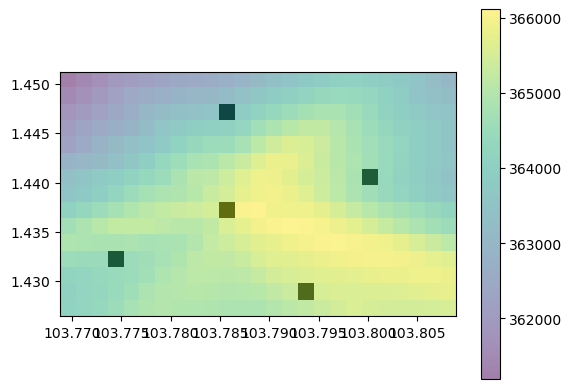

In [132]:

fig,ax=plt.subplots()
shw = ax.imshow(mrt, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=1,cmap='Greys')
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=0.5)
bar = plt.colorbar(shw)
plt.show()

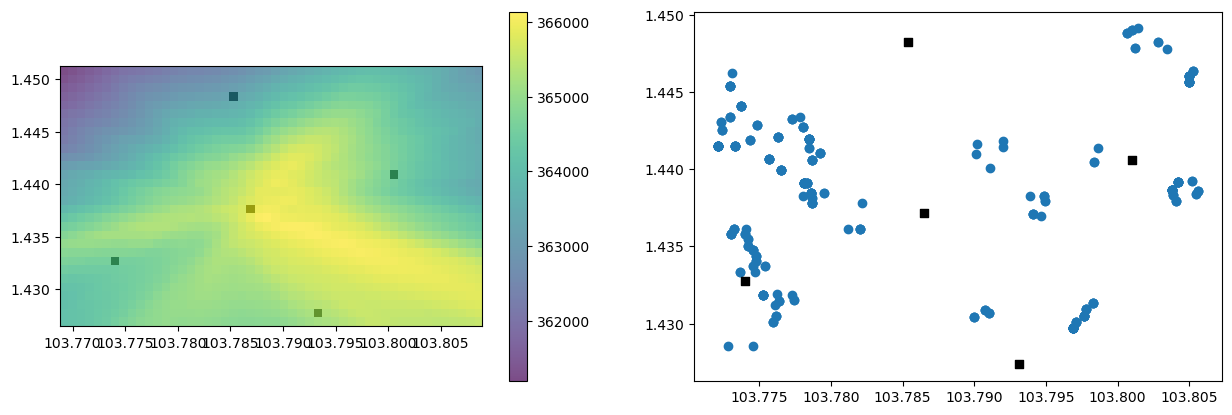

In [169]:
def min_coords(lat,long):
  return (np.abs((lats-lat)).argmin(), np.abs(longs-long).argmin())

marsiling = (1.43278,103.77397)
woodlands = (1.43718,103.78646)
admiralty = (1.44063, 103.80098)
woodlands_south = (1.42735,103.79314)
woodlands_north = (1.44827,103.78536)
mrts = [woodlands, woodlands_north, woodlands_south, marsiling, admiralty]
mrt_map = np.zeros((n2,n1))
for mrt in mrts:
  (i,j) = min_coords(*mrt)
  mrt_map[i][j] = 1

fig,(ax,ax2)=plt.subplots(1,2)
shw2 = ax.imshow(mrt_map, extent=[longLeft, longRight, latLeft, latRight], origin='lower',cmap='Greys',alpha=1.0)
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=0.7)
bar = plt.colorbar(shw)

ax2.scatter(df.long,df.lat)
ax2.scatter([y for _,y in mrts], [x for x,_ in mrts],marker='s',c='black',)
fig.set_figwidth(15)

plt.show()


In [158]:
[x for x,_ in mrts]
[y for _,y in mrts]

[103.78646, 103.78536, 103.79314, 103.77397, 103.80098]